In [1]:
import pandas as pd
import numpy as np

In [5]:
file_path = './data/04_(문제)_회귀모델_drinking_water.csv'
df = pd.read_csv(file_path)
df

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
...,...,...,...
259,3,4,4
260,3,4,3
261,4,4,4
262,4,4,4


In [9]:
input_ = df[['친밀도', '적절성']]
target_ = df['만족도']

In [14]:
input_ = input_.to_numpy()
target_ = target_.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = \
train_test_split(input_, target_, random_state = 123)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
kn = KNeighborsClassifier(n_neighbors = 5)

In [37]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [38]:
kn.score(train_input, train_target)

0.6767676767676768

In [39]:
kn.score(test_input, test_target)

0.6515151515151515

In [43]:
for n in range(1, 50):
    kn = KNeighborsClassifier(n_neighbors = 5)
    kn.fit(train_input, train_target)
    print('학습데이터 = ', kn.score(train_input, train_target))
    print('테스트 데이터 = ', kn.score(test_input, test_target))
    print('\n')

학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0.6515151515151515


학습데이터 =  0.6767676767676768
테스트 데이터 =  0

In [40]:
import matplotlib.pyplot as plt
plt.rc('font', family = "Malgun Gothic")

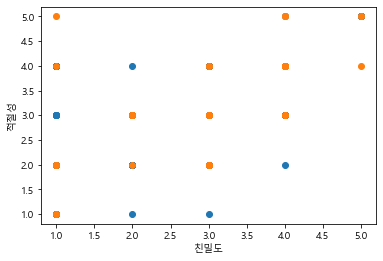

In [41]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('친밀도')
plt.ylabel('적절성')

plt.show()

In [ ]:
### 데이터의 특성이 불분명하기 때문에 더 많은 데이터나 추가적인 특성이 필요함

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
kn = KNeighborsRegressor()

In [45]:
kn.fit(train_input, train_target)

KNeighborsRegressor()

In [46]:
kn.score(train_input, train_target)

0.5088467516319551

In [47]:
kn.score(test_input, test_target)

0.5804130499850344

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
### train_input, test_input 데이터 변환하기...
# 변수명 : train_poly, test_poly 사용
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
ln = LinearRegression()

In [52]:
ln.fit(train_poly, train_target)

LinearRegression()

In [53]:
ln.score(train_poly, train_target)

0.6178685252026206

In [54]:
ln.score(test_poly, test_target)

0.7073949562050486

In [57]:
for n in range(1,5):
    poly = PolynomialFeatures(degree=n, include_bias = False)

    poly.fit(train_input)
    train_poly = poly.transform(train_input)
    test_poly = poly.transform(test_input)

    ln = LinearRegression()
    ln.fit(train_poly, train_target)
    print('학습데이터 = ', ln.score(train_poly, train_target))
    print('테스트데이터 = ', ln.score(test_poly, test_target))
    print('\n')

학습데이터 =  0.5756826890052986
테스트데이터 =  0.6517544834808644


학습데이터 =  0.6178685252026206
테스트데이터 =  0.7073949562050486


학습데이터 =  0.6220780383276789
테스트데이터 =  0.6882652021935134


학습데이터 =  0.6388304968666646
테스트데이터 =  0.378159403369146




In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss = StandardScaler()

In [60]:
ss.fit(train_poly, train_target)

StandardScaler()

In [61]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [62]:
from sklearn.linear_model import Ridge, Lasso

In [63]:
ridge = Ridge()

In [64]:
ridge.fit(train_scaled, train_target)

Ridge()

In [65]:
ridge.score(train_scaled, train_target)

0.6157093498352304

In [66]:
ridge.score(test_scaled, test_target)

0.7121257561821667

In [71]:
lasso = Lasso()

In [72]:
lasso.fit(train_scaled, train_target)

Lasso()

In [73]:
lasso.score(train_scaled, train_target)

0.0

In [74]:
lasso.score(test_scaled, test_target)

-0.000831421064884319

In [75]:
import matplotlib.pyplot as plt

C:\DEV\Tools\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


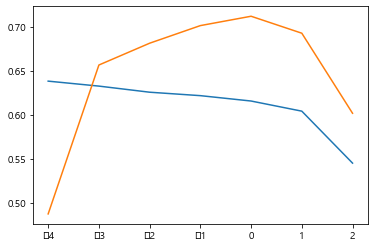

In [77]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list : 
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [78]:
# 릿지 모델
ridge = Ridge(alpha = 0.001)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6326763314897021
0.6566595460625655


C:\DEV\Tools\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


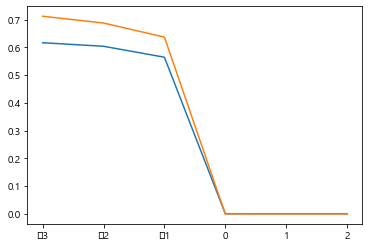

In [79]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list : 
    # 릿지모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [80]:
# 라쏘 모델
lasso = Lasso(alpha = 0.1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.564609501365046
0.6371834099913387
